In [1]:
import os
import numpy as np
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
import legacyhalos.io
from legacyhalos.misc import lambda2mhalo

In [3]:
%matplotlib inline

In [7]:
results = legacyhalos.io.read_results(extname='SERSIC_SINGLE', verbose=True)
results

Reading extension SERSIC_SINGLE from /Users/ioannis/research/projects/legacyhalos/legacyhalos-results.fits


mem_match_id,success,converged,alpha,alpha_err,beta,beta_err,nref,nref_err,r50ref,r50ref_err,mu50_g,mu50_g_err,mu50_r,mu50_r_err,mu50_z,mu50_z_err,flux_obs_g,flux_obs_r,flux_obs_z,flux_g,flux_r,flux_z,dm_in_g,dm_in_r,dm_in_z,dm_out_g,dm_out_r,dm_out_z,dm_g,dm_r,dm_z
int32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
45,True,True,-0.0896957,0.122508,-0.0957968,0.137978,1.91022,0.0577373,4.00099,0.13382,0.199276,0.0201975,0.816987,0.0470995,1.98875,0.158386,64.2374,241.236,529.583,65.6762,246.359,540.128,0.0144297,0.0148351,0.0152698,0.0100296,0.00835461,0.00647501,0.0245941,0.0233051,0.0218368
52,True,True,0.304888,0.0672704,-0.036277,0.053051,2.18972,0.0374502,4.43634,0.0592573,1.36325,0.0592292,3.36432,0.0985042,6.19666,0.295627,446.477,1116.57,2026.77,453.693,1138.52,2079.53,0.0161404,0.0189574,0.0239034,0.0015259,0.00255478,0.00463253,0.0176892,0.0215573,0.0286393
449,True,True,0.233022,0.089644,0.0121987,0.115574,2.27046,0.0519193,7.38411,0.214959,0.3168,0.0255225,0.940613,0.0477932,1.71191,0.135368,295.623,847.416,1622.85,305.023,881.83,1703.03,0.00755148,0.00914408,0.010582,0.0273395,0.0355623,0.0439884,0.0350843,0.0450122,0.0550102
455,True,True,0.417523,0.107137,0.211171,0.136447,1.5989,0.0418538,5.25655,0.171834,0.106802,0.0092317,0.435183,0.0221985,0.754426,0.0583838,48.137,192.899,407.82,48.7245,197.47,424.659,0.00561431,0.00734996,0.0084207,0.00767846,0.0185604,0.0370688,0.0133327,0.0260375,0.0457832
486,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,True,False,1.0,0.0,-0.351273,0.0,1.13523,0.0,1.46756,0.0,0.877051,0.0,2.77393,0.0,6.06245,0.0,20.9533,43.3481,49.0917,21.7473,46.9239,61.0686,0.0419424,0.0934737,0.303646,1.20541e-15,8.27755e-10,4.94984e-06,0.0419424,0.0934737,0.303652
559,True,True,0.613002,0.108391,0.118277,0.0996956,2.48921,0.0641803,3.78656,0.0853643,0.753198,0.0520285,2.07377,0.0951157,3.75033,0.306209,171.107,554.254,1152.67,175.065,571.425,1210.02,0.0234846,0.0284088,0.0386196,0.00188698,0.00561032,0.016196,0.0254128,0.0341683,0.0554066
600,True,True,0.285973,0.138066,0.482882,0.080728,1.28848,0.0367975,3.29399,0.0583005,0.800964,0.0632659,1.55926,0.0594502,2.4113,0.191645,92.0438,270.312,574.0,93.3282,273.321,580.854,0.0152168,0.0118454,0.0107195,3.88095e-05,0.000305627,0.00229954,0.0152562,0.0121544,0.0130418
729,True,True,0.844127,0.175707,0.158952,0.0976892,1.15699,0.0468509,2.6048,0.0518615,0.26921,0.0231554,1.25078,0.0684187,2.21967,0.210953,24.14,131.885,317.841,24.3844,133.541,323.016,0.0110483,0.01371,0.017119,5.02204e-08,1.6447e-05,0.000696139,0.0110484,0.0137266,0.0178262


In [8]:
parent = legacyhalos.io.read_parent(extname='LSPHOT', upenn=True, verbose=True)
parent

Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [LSPHOT]


release,brickid,brickname,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,flux_u,flux_g,flux_r,flux_i,flux_z,flux_y,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_u,flux_ivar_g,flux_ivar_r,flux_ivar_i,flux_ivar_z,flux_ivar_y,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,apflux_u [8],apflux_g [8],apflux_r [8],apflux_i [8],apflux_z [8],apflux_y [8],apflux_resid_u [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_i [8],apflux_resid_z [8],apflux_resid_y [8],apflux_ivar_u [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_i [8],apflux_ivar_z [8],apflux_ivar_y [8],mw_transmission_u,mw_transmission_g,mw_transmission_r,mw_transmission_i,mw_transmission_z,mw_transmission_y,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_u,nobs_g,nobs_r,nobs_i,nobs_z,nobs_y,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_u,rchisq_g,rchisq_r,rchisq_i,rchisq_z,rchisq_y,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_u,fracflux_g,fracflux_r,fracflux_i,fracflux_z,fracflux_y,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_u,fracmasked_g,fracmasked_r,fracmasked_i,fracmasked_z,fracmasked_y,fracin_u,fracin_g,fracin_r,fracin_i,fracin_z,fracin_y,anymask_u,anymask_g,anymask_r,anymask_i,anymask_z,anymask_y,allmask_u,allmask_g,allmask_r,allmask_i,allmask_z,allmask_y,wisemask_w1,wisemask_w2,psfsize_u,psfsize_g,psfsize_r,psfsize_i,psfsize_z,psfsize_y,psfdepth_u,psfdepth_g,psfdepth_r,psfdepth_i,psfdepth_z,psfdepth_y,galdepth_u,galdepth_g,galdepth_r,galdepth_i,galdepth_z,galdepth_y,wise_coadd_id,lc_flux_w1 [7],lc_flux_w2 [7],lc_flux_ivar_w1 [7],lc_flux_ivar_w2 [7],lc_nobs_w1 [7],lc_nobs_w2 [7],lc_fracflux_w1 [7],lc_fracflux_w2 [7],lc_rchisq_w1 [7],lc_rchisq_w2 [7],lc_mjd_w1 [7],lc_mjd_w2 [7],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar
int16,int32,bytes8,int32,bool,bytes4,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
5000,350049,2407p032,4026,True,DEV,240.829131417,3.27905301114,7.39469e+12,7.82942e+12,155.908,2198.8,805429.0 .. 1.22505e+06,0.131241,56404.2671927,57603.9668753,0.0,56.6587,228.5,0.0,562.889,0.0,749.382,531.548,222.894,1347.96,0.0,38.2828,13.3693,0.0,2.9326,0.0,0.491633,0.113302,0.00035686,1.05384e-05,0.0 .. 0.0,1.96082 .. 40.9147,8.27318 .. 157.024,0.0 .. 0.0,21.4745 .. 378.622,0.0 .. 0.0,0.0 .. 0.0,0.0419421 .. 0.103721,0.529276 .. -3.39581,0.0 .. 0.0,1.64001 .. -13.2345,0.0 .. 0.0,0.0 .. 0.0,10360.2 .. 52.8579,5044.23 .. 25.7359,0.0 .. 0.0,687.468 .. 3.21099,0.0 .. 0.0,0.616987,0.678072,0.769742,0.824946,0.863827,0.879313,0.978004,0.986434,0.997091,0.998901,0,3,3,0,4,0,84,84,13,13,0.0,1.41654,3.04899,0.0,5.20142,0.0,14.8612,1.81925,0.872876,0.0816663,0.0,0.0486396,0.0413673,0.0,0

In [15]:
-2.5 * np.log10(results['flux_obs_r'] / parent['flux_r'])

/usr/local/anaconda3/envs/legacyhalos/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-0.0588904
-0.307521
-0.274505
-0.159065
inf
3.07993
-0.269032
-0.539028
0.62714
-0.053817
0.279554


In [16]:
ls = Table(fits.getdata(parentfile, extname='LSPHOT-ISEDFIT'))
ls

NameError: name 'fits' is not defined

In [17]:
mhalo = np.log10(lambda2mhalo(cat.lambda_chisq, redshift=cat.z))
mhalo

NameError: name 'lambda2mhalo' is not defined

In [18]:
mstar_med, bin_edges, _ = binned_statistic(mhalo, cat.mstar_avg, statistic='median', bins=bins)
bin_width = (bin_edges[1] - bin_edges[0])
mhalo_med = bin_edges[1:] - bin_width/2
print(bin_width)

NameError: name 'binned_statistic' is not defined

NameError: name 'sns' is not defined

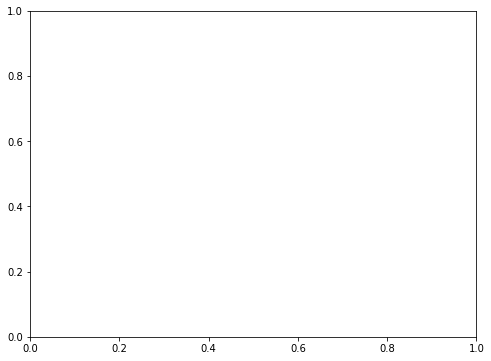

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = iter(sns.color_palette())

rich = cat.lambda_chisq > 100
ax.plot(mhalo_med, mstar_med, color='k', ls='-', lw=3, alpha=0.5)
ax.plot(mhalo_med, mstar_p75, color='k', ls='--', lw=3, alpha=0.5)
ax.plot(mhalo_med, mstar_p25, color='k', ls='--', lw=3, alpha=0.5)

g = ax.errorbar(gonz['m500'], gonz['mbcg'], yerr=gonz['mbcg_err'], color=next(colors),
                fmt='o', label='Gonzalez+13', markersize=10)
k = ax.errorbar(krav['m500'], krav['mbcg'], yerr=krav['mbcg_err'], color=next(colors),
                fmt='s', label='Kravtsov+14', markersize=10)
r = ax.scatter(mhalo[rich], cat.mstar_avg[rich], alpha=0.9, color=next(colors),
               edgecolor='k', marker='D', s=50, label=r'redMaPPer ($\lambda>100$)')

ax.text(0.12, 0.16, 'redMaPPer\n$0.1<z<0.3$', multialignment='center',
        transform=ax.transAxes, fontsize=14)
m500 = np.linspace(13.55, 15.25, 50)
ff = ax.plot(m500, np.polyval([0.33, 12.24], m500-14.5), ls='-', 
            color='k', label=r'$M_{*}\propto M_{500}^{0.33}$')
ax.text(0.12, 0.9, r'$M_{*}\propto M_{500}^{0.33}$', multialignment='center',
        transform=ax.transAxes, fontsize=16)
ax.plot([13.55, 13.68], [12.8, 12.8], ls='-', color='k') # hack!!!

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

hh = [g, k, r]
ax.legend(hh, [H.get_label() for H in hh], loc='lower right',
          frameon=True, fontsize=16)
#ax.legend(ff, ff.get_label(), loc='upper left',
#          frameon=True, fontsize=16)
#ax.legend(loc='upper left', frameon=True, fontsize=16)

ax.set_ylim(10.5, 13)
ax.set_xlim(13.5, 15.3)
ax.set_xlabel(r'$\log_{10}\, (M_{500}\ /\ M_{\odot})$')
ax.set_ylabel(r'$\log_{10}\, (M_{*}\ /\ M_{\odot})$')

In [ ]:
sns.jointplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
              kind="kde", color="#4CB391", xlim=(10, 13), ylim=(-0.5, 0.5))
sns.kdeplot(ls['MSTAR_AVG'], sdss['MSTAR_AVG'] - ls['MSTAR_AVG'], 
            cmap="Blues", shade=True, shade_lowest=True, cbar=True,
            cut=0,
           )